**Data Understanding**

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
df = pd.read_csv('./dataset/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [54]:
df.shape

(3276, 10)

## Data Preparation

In [55]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Cek NULL dalam datasets.<br>
Terdapat nilai NULL<br>
491 : ph,<br> 
781 : Sulfate, dan <br>
181 : Trihalomethanes.

In [56]:
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


Melakukan penanganan untuk nilai nullnya dengan mengisikan data yang bernilai null dengan median atau nilai tengah dari data yang ada dalam setiap fitur.

In [57]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Ceking NULL

In [58]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


describe setap fitur yang bernilai numerik dengan mendeskripsikan count, mean, std, min, 25%, 50%, 75%, dan max.

In [59]:
num_col = (df.columns).to_list()
num_col = num_col[0:]

In [60]:
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print('lower bound : ', lwr_bound, '; upper bound : ', upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

cek outlier

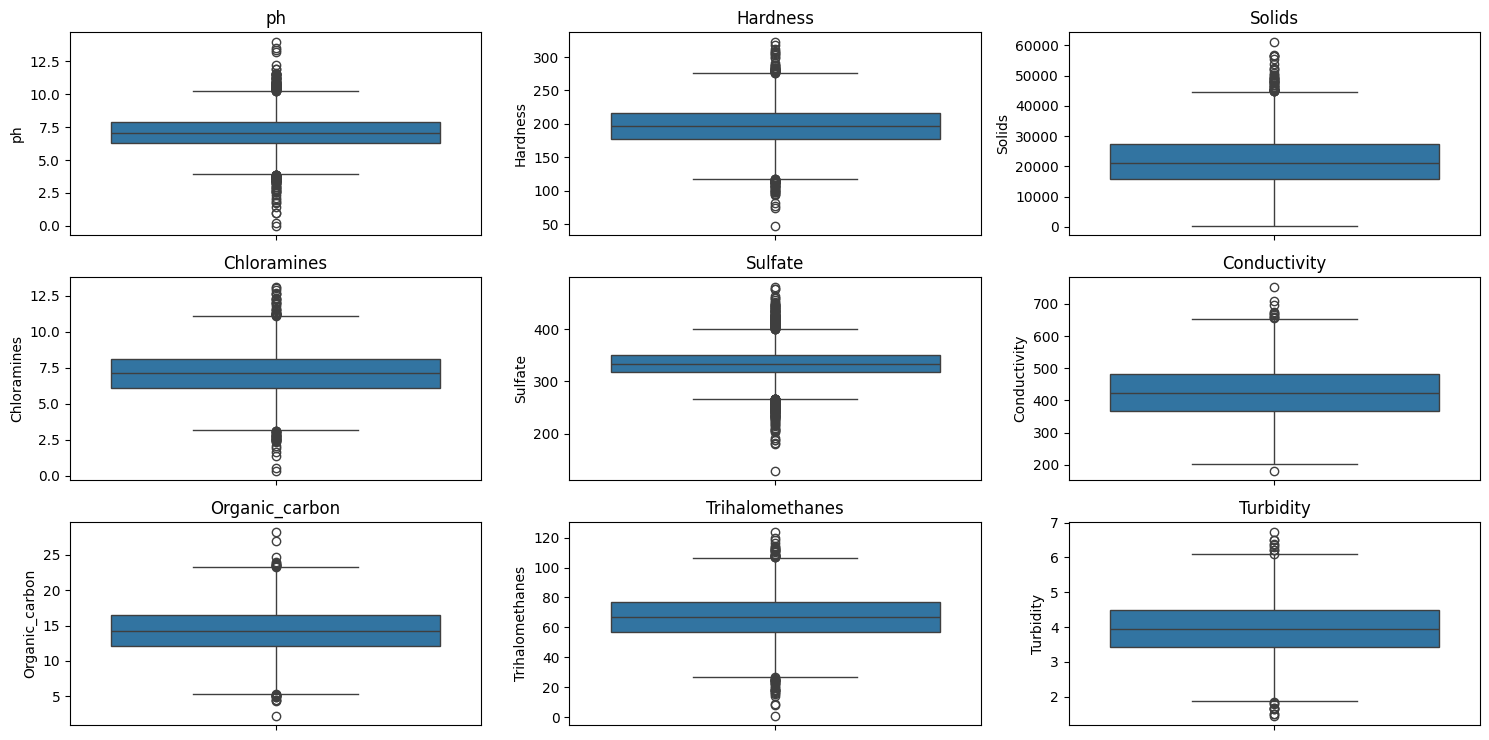

In [61]:
# Daftar kolom 
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
        'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
fig, axs = plt.subplots(3, 3, figsize=(15, 7.5))

# Mengubah daftar kolom menjadi iterator
columns_iter = iter(columns)

# Loop untuk mengisi setiap subplot
for i in range(3):
    for j in range(3):
        col = next(columns_iter)
        sns.boxplot(df[col], ax=axs[i, j])
        axs[i, j].set_title(col)  # Menambahkan judul pada setiap subplot

plt.tight_layout()
plt.show()

pengecekan outliner dengan visualisasi

In [62]:
#Membuat fungsi outliers untuk mengatasi outliers
def outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(df)):
      if df[column].iloc[i] > upper_bound:
          df[column].iloc[i] = upper_bound
      if df[column].iloc[i] < lower_bound:
          df[column].iloc[i] = lower_bound

for feature in num_col:
  outliers(df, feature)

menggunakan quantile, lower bound, dan upper bound untuk mengatasi outliner

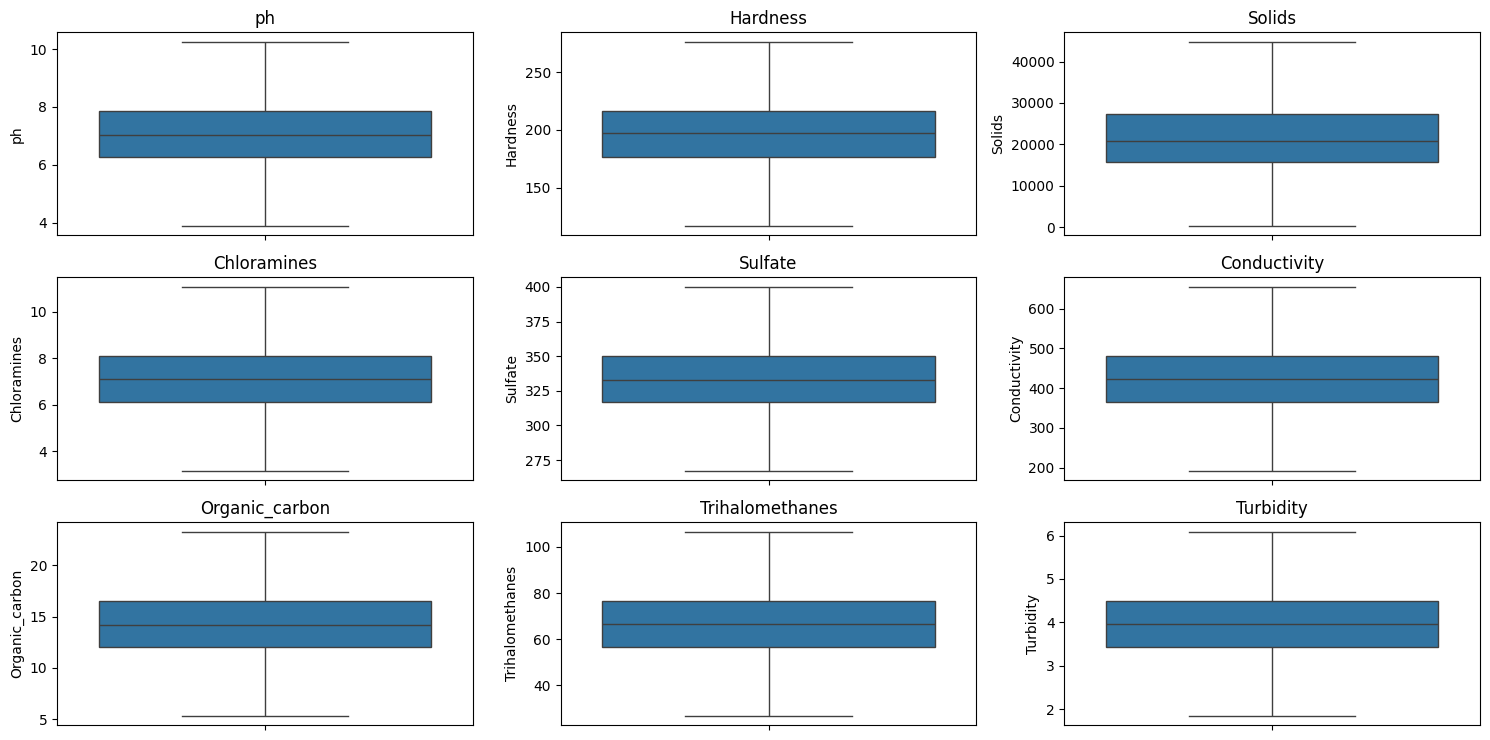

In [63]:
# Daftar kolom 
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
        'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
fig, axs = plt.subplots(3, 3, figsize=(15, 7.5))

# Mengubah daftar kolom menjadi iterator
columns_iter = iter(columns)

# Loop untuk mengisi setiap subplot
for i in range(3):
    for j in range(3):
        col = next(columns_iter)
        sns.boxplot(df[col], ax=axs[i, j])
        axs[i, j].set_title(col)  # Menambahkan judul pada setiap subplot

plt.tight_layout()
plt.show()

visualisasi

## Modelling

In [64]:
x = df.iloc[:,[0,1]].values
y = df.iloc[:,-1].values

In [65]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.9)
print('Total data training : ', len(X_train))
print('Total data testing : ', len(X_test))

Total data training :  2948
Total data testing :  328


split data

In [66]:
print(X_test)

[[  5.49948929 230.30877473]
 [  8.7572574  200.19140044]
 [  6.15349592 163.20554798]
 [  7.53988189 185.82597534]
 [  5.49215598 176.27140374]
 [  6.97539234 205.94024616]
 [  7.0367521  204.2405692 ]
 [  5.23045397 152.09416941]
 [  7.34223125 198.16880423]
 [  7.36991164 155.64480514]
 [  6.39454802 193.04755784]
 [  4.63825026 182.41962094]
 [  7.0367521  230.80948247]
 [  9.2528934  236.09878581]
 [  6.79369863 227.22575069]
 [  6.6249436  185.41093293]
 [  6.04738086 230.5862845 ]
 [  6.33073277 166.738009  ]
 [  9.06662805 203.38412336]
 [  9.73588939 209.76151279]
 [ 10.25861543 199.6093636 ]
 [  7.0367521  221.12696274]
 [  6.4530648  178.99824539]
 [  6.11518004 226.08442939]
 [  7.89925652 187.70065418]
 [  7.45870768 207.78657341]
 [  7.52051893 228.56261145]
 [  5.84293308 168.29528712]
 [  7.95887145 184.82855705]
 [  6.25926753 130.37427186]
 [  6.66021203 168.28374686]
 [  6.75169859 203.40045195]
 [  5.55535297 154.30068365]
 [  5.71332292 196.24570567]
 [  7.0367521 

In [67]:
# Melakukan skala menggunakan standard scaaler
# Tujuan agar rentang data dan nilai antar atribut sama
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [68]:
print(X_test)

[[-1.15846778e+00  1.04833453e+00]
 [ 1.22693923e+00  6.38751416e-02]
 [-6.79590226e-01 -1.14509711e+00]
 [ 3.35551027e-01 -4.05693604e-01]
 [-1.16383738e+00 -7.18007939e-01]
 [-7.77802122e-02  2.51790101e-01]
 [-3.28512907e-02  1.96232039e-01]
 [-1.35546115e+00 -1.50829946e+00]
 [ 1.90827028e-01 -2.23831902e-03]
 [ 2.11095200e-01 -1.39223832e+00]
 [-5.03086759e-01 -1.69638672e-01]
 [-1.78908529e+00 -5.17038555e-01]
 [-3.28512907e-02  1.06470138e+00]
 [ 1.58985444e+00  1.23759508e+00]
 [-2.10820203e-01  9.47558418e-01]
 [-3.34386224e-01 -4.19260271e-01]
 [-7.57289932e-01  1.05740561e+00]
 [-5.49813646e-01 -1.02963006e+00]
 [ 1.45346699e+00  1.68237030e-01]
 [ 1.94351436e+00  3.76697464e-01]
 [ 2.32626547e+00  4.48498563e-02]
 [-3.28512907e-02  7.48204749e-01]
 [-4.60239530e-01 -6.28874509e-01]
 [-7.07645931e-01  9.10251564e-01]
 [ 5.98692759e-01 -3.44415181e-01]
 [ 2.76113547e-01  3.12141783e-01]
 [ 3.21373052e-01  9.91256953e-01]
 [-9.06990936e-01 -9.78726647e-01]
 [ 6.42344077e-01 -4

Hasil print X_test setelah di standard scaler

In [69]:
# Mendefinisikan seed dan nilai untuk accuracy 
seed = 7
nilai = 'accuracy'

In [70]:
models = []

models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=7, metric='euclidean')))
models.append(('Random Forest', RandomForestClassifier()))

In [71]:
# Import library model
from sklearn import model_selection

results = []
names = []

# Membagi data menggunakan k-fold cross menjadi training dan validation set
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=nilai)
  results.append(cv_results)
  msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

SVM : 0.611947 (0.024852)
KNN : 0.572594 (0.027210)
Random Forest : 0.584479 (0.030468)


## 1. KNN

In [72]:
#Evaluasi algoritma KNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)

print('akurasi pada testing data : ', accuracy_score(y_test, predictions))
print('confusion matrix : ', confusion_matrix(y_test, predictions))
print('classification report : \n', classification_report(y_test, predictions
))

akurasi pada testing data :  0.5853658536585366
confusion matrix :  [[151  61]
 [ 75  41]]
classification report : 
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       212
           1       0.40      0.35      0.38       116

    accuracy                           0.59       328
   macro avg       0.54      0.53      0.53       328
weighted avg       0.57      0.59      0.58       328



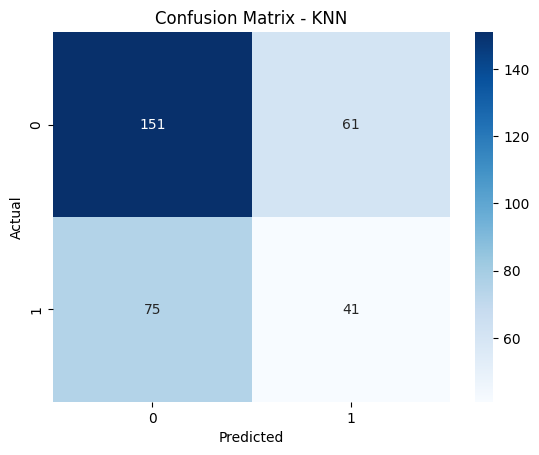

In [73]:
#Confusion matrix algoritma KNN
KNN = confusion_matrix(y_test, predictions)
sns.heatmap(KNN, annot=True, fmt='d', cmap='Blues')

# Menampilkan plot heatmap
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2. SVM

In [74]:
#Evaluasi algoritma SVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_model = SVC()

svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_test)

print('akurasi pada testing data : ', accuracy_score(y_test, predictions))
print('confusion matrix : ', confusion_matrix(y_test, predictions))
print('classification report : \n', classification_report(y_test, predictions
))

akurasi pada testing data :  0.6585365853658537
confusion matrix :  [[209   3]
 [109   7]]
classification report : 
               precision    recall  f1-score   support

           0       0.66      0.99      0.79       212
           1       0.70      0.06      0.11       116

    accuracy                           0.66       328
   macro avg       0.68      0.52      0.45       328
weighted avg       0.67      0.66      0.55       328



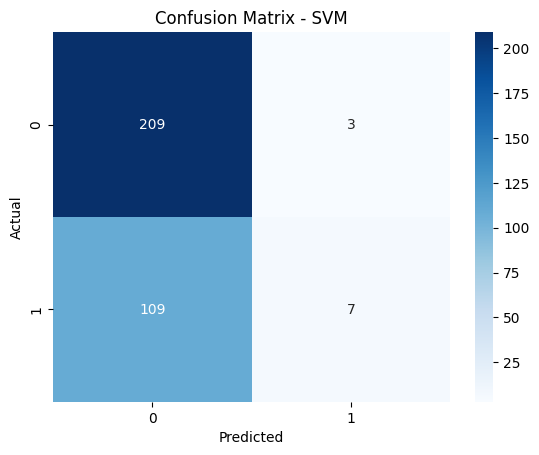

In [75]:
#Confusion matrix algoritma SVM
SVM = confusion_matrix(y_test, predictions)
sns.heatmap(SVM, annot=True, fmt='d', cmap='Blues')

# Menampilkan plot heatmap
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3. Random Forest

In [76]:
# Evaluasi algoritma Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier()

# Melatih model
rf_model.fit(X_train, y_train)

# Melakukan prediksi
predictions = rf_model.predict(X_test)

# Menampilkan hasil evaluasi
print('Akurasi pada testing data : ', accuracy_score(y_test, predictions))
print('Confusion matrix : \n', confusion_matrix(y_test, predictions))
print('Classification report : \n', classification_report(y_test, predictions))



Akurasi pada testing data :  0.5670731707317073
Confusion matrix : 
 [[141  71]
 [ 71  45]]
Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67       212
           1       0.39      0.39      0.39       116

    accuracy                           0.57       328
   macro avg       0.53      0.53      0.53       328
weighted avg       0.57      0.57      0.57       328



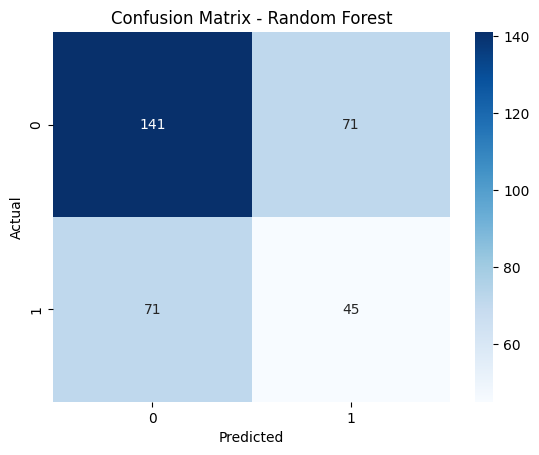

In [77]:
# Confusion matrix untuk algoritma Random Forest
RF_cm = confusion_matrix(y_test, predictions)
sns.heatmap(RF_cm, annot=True, fmt='d', cmap='Blues')

# Menampilkan plot heatmap
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
